# Exploring Oura ring data

In [14]:
#%pip install pandas mlplot

import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
from matplotlib.dates import DateFormatter


## First, let's grab data from local json file, using only sleep data

In [2]:
def grab_oura_json(file_path):    
    with open(file_path) as activities_file:
        data = json.load(activities_file)
        return data

file_path = 'data/oura_activities.json'
data = grab_oura_json(file_path)
# activity, notes, readiness, restful_periods, sleep    
df = pd.DataFrame.from_dict(data['sleep'])
#sleep_df.info()
#sleep_df.head()
#sleep_df.describe()

## Now, let's build an index of bedtime_end date components

In [3]:
df['datetime'] = pd.to_datetime(df['bedtime_end'], utc=True).dt.normalize()
df.set_index('datetime')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   awake                        471 non-null    int64              
 1   bedtime_end                  471 non-null    object             
 2   bedtime_end_delta            471 non-null    int64              
 3   bedtime_start                471 non-null    object             
 4   bedtime_start_delta          471 non-null    int64              
 5   breath_average               471 non-null    float64            
 6   deep                         471 non-null    int64              
 7   duration                     471 non-null    int64              
 8   efficiency                   471 non-null    int64              
 9   hr_5min                      471 non-null    object             
 10  hr_average                   471 non-null    float

# Time to plot some sleep metrics over timeline

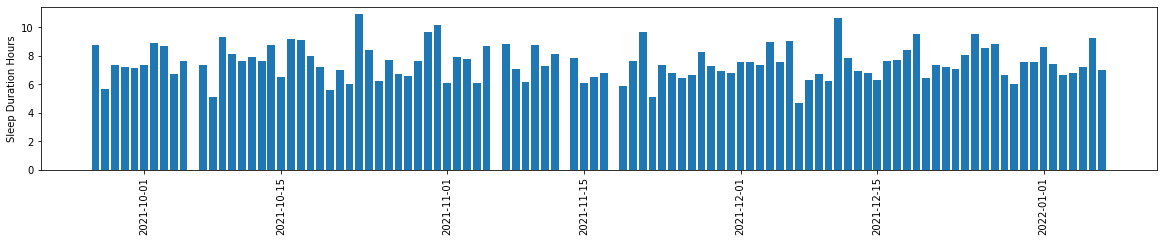

In [28]:

# duration, awake, rem, light, deep
# hr_lowest, hr_average, hr_5min
# efficiency, onset_latency, midpoint_time, restless
# temperature_delta, breath_average
# score, score_total, score_rem, score_deep, score_efficiency, score_latency, score_disturbances, score_alignment
# rmssd, rmssd_5min
df['duration_hours']=df['duration']/3600 # Convert seconds to hours
df = df.tail(100) # Grab 100 recent dates

plt.rcParams["figure.figsize"] = (20,3)
fig, ax = plt.subplots()
plt.bar("datetime", "duration_hours", data=df, axes=ax) 
dfmt = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(dfmt)
ax.set_ylabel("Sleep Duration Hours")
plt.xticks(rotation=90) 
plt.show()

